In [6]:
%matplotlib inline
import os
import sys
import numpy 
import pandas 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# !pip install plotly

# imports regression library
# OLS: ordinary least squares (estimation technique used to estimate the linear regression model)
import statsmodels.api as sm
from statsmodels.formula.api import ols
    
# Set some Pandas options
pandas.set_option('display.notebook_repr_html', True)
pandas.set_option('display.max_columns', 20)
pandas.set_option('display.max_rows', 50)

from decimal import getcontext, Decimal
# Set the precision.
getcontext().prec = 2

In [7]:
dm = pandas.read_csv('shots.csv')
dm = dm[(dm['advantagetypeshooter']=='EV')] 
dm = dm[dm['zone']=="O"]

In [8]:
dm['isgoal'] = dm['eventtype']=='GOAL'
dm['XNormAdj'] = 99 - dm['XNorm']
dm.groupby(['eventtype'])[['XNormAdj', 'YNorm']].describe()

XNormAdj         YNorm
eventtype                                  
GOAL      count   4678.000000   4678.000000
          mean      28.037409     -0.132535
          std       13.088705     12.242820
          min        2.000000    -39.000000
          25%       18.000000     -6.000000
          50%       24.000000      0.000000
          75%       35.000000      6.000000
          max       72.000000     40.000000
SHOT      count  52508.000000  52508.000000
          mean      37.724861     -0.398358
          std       16.811628     19.822985
          min        0.000000    -42.000000
          25%       22.000000    -16.000000
          50%       36.000000     -1.000000
          75%       51.000000     15.000000
          max       73.000000     42.000000

In [9]:
dm['XNormAdj'] = dm['XNormAdj'] + 1
dm['YNormAdj'] = numpy.absolute(dm['YNorm'])
dm['YNormAdj'] = dm['YNormAdj'] + 1

dm['lnX'] = numpy.log(dm['XNormAdj'])
dm['lnY'] = numpy.log(dm['YNormAdj'])

dm['dscore'] = dm['tgoals'] - dm['ogoals']
dm['oteamcode'] = dm.apply(lambda x: 1 if (x['teamcode'] == x['hteamcode']) else x['vteamcode'], axis=1)

In [10]:
dw = dm[dm['shotType']=='Backhand']

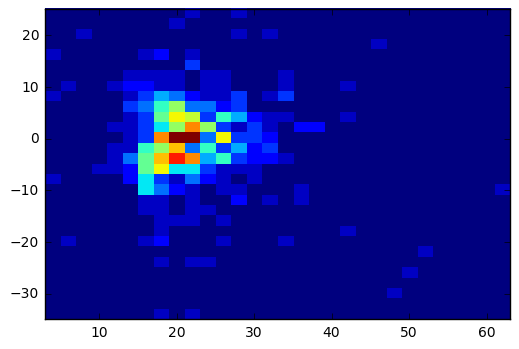

In [11]:
dg = dw[dw['eventtype']=='GOAL']

plt.hist2d(dg['XNormAdj'], dg['YNorm'],bins=30)
plt.show()

Optimization terminated successfully.
         Current function value: 0.317752
         Iterations 7
        Logit Marginal Effects       
Dep. Variable:                 isgoal
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
lnX           -0.0770      0.013     -5.844      0.000        -0.103    -0.051


/Users/Alex/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/Alex/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


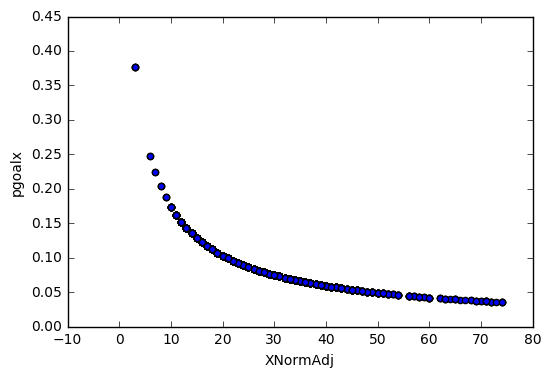

In [12]:
m1 = sm.Logit(dw['isgoal'], sm.add_constant(dw['lnX'])).fit()
print m1.get_margeff(method='dydx', at='overall').summary()

# Generate predicted values and predict results
dw.ix[:, 'pgoalx'] = m1.predict()
dw.plot(kind='scatter',x='XNormAdj', y='pgoalx')

Optimization terminated successfully.
         Current function value: 0.301774
         Iterations 7
        Logit Marginal Effects       
Dep. Variable:                 isgoal
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
lnY           -0.0652      0.005    -13.630      0.000        -0.075    -0.056


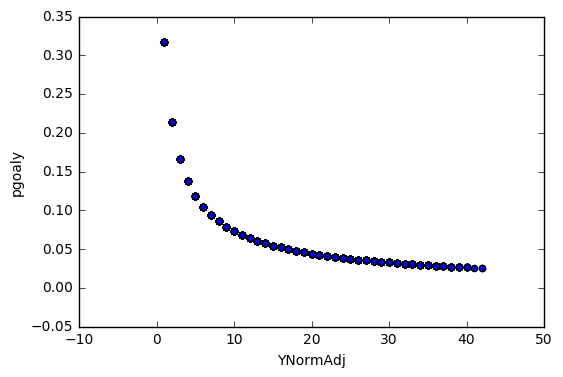

In [13]:
m2 = sm.Logit(dw['isgoal'], sm.add_constant(dw['lnY'])).fit()
print m2.get_margeff(method='dydx', at='overall').summary()

# Generate predicted values and predict results
dw.ix[:, 'pgoaly'] = m2.predict()
dw.plot(kind='scatter', x='YNormAdj', y='pgoaly')


In [14]:
m3 = sm.Logit(dw['isgoal'], sm.add_constant(dw[['lnX', 'lnY']])).fit()
print m3.get_margeff(method='dydx', at='overall').summary()
dw.ix[:, 'pgoal'] = m3.predict()

Optimization terminated successfully.
         Current function value: 0.297700
         Iterations 7
        Logit Marginal Effects       
Dep. Variable:                 isgoal
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
lnX           -0.0902      0.014     -6.341      0.000        -0.118    -0.062
lnY           -0.0683      0.005    -13.777      0.000        -0.078    -0.059


In [15]:
dw.describe()

,season,gamenumber,eventnumber,period,eventtimefromzero,isTHome,playernumber,tgoals,ogoals,X,...,XNorm,YNorm,XNormAdj,YNormAdj,lnX,lnY,dscore,pgoalx,pgoaly,pgoal
count,5222.0,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,...,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000
mean,2011.0,20622.310417,155.463807,2.038491,587.949828,0.479127,29.869590,1.316162,1.195136,-0.116047,...,76.662581,-2.464764,23.337419,11.243010,3.093281,2.103069,0.121026,0.098238,0.098238,0.098238
std,0.0,350.455459,90.302794,0.852822,347.328575,0.499612,13.707482,1.362129,1.287614,77.157743,...,8.663355,13.260413,8.663355,8.773563,0.328092,0.844278,1.524210,0.024967,0.062573,0.067331
min,2011.0,20001.000000,3.000000,1.000000,5.000000,0.000000,1.000000,0.000000,0.000000,-97.000000,...,26.000000,-41.000000,3.000000,1.000000,1.098612,0.000000,-8.000000,0.035279,0.025408,0.007063
25%,2011.0,20323.000000,77.000000,1.000000,276.250000,0.000000,30.000000,0.000000,0.000000,-79.000000,...,73.000000,-10.000000,18.000000,5.000000,2.890372,1.609438,-1.000000,0.081191,0.054491,0.048466
50%,2011.0,20623.000000,156.000000,2.000000,577.500000,0.000000,31.000000,1.000000,1.000000,-37.500000,...,79.000000,-2.000000,21.000000,9.000000,3.044522,2.197225,0.000000,0.099181,0.078701,0.084774
75%,2011.0,20923.000000,230.000000,3.000000,894.750000,1.000000,35.000000,2.000000,2.000000,79.000000,...,82.000000,5.000000,27.000000,15.000000,3.295837,2.708050,1.000000,0.111901,0.118441,0.128011
max,2011.0,21230.000000,389.000000,4.000000,1200.000000,1.000000,70.000000,9.000000,9.000000,97.000000,...,97.000000,39.000000,74.000000,42.000000,4.304065,3.737670,8.000000,0.376709,0.317063,0.456401


In [16]:
# season
dw.groupby(['season'])[['isgoal', 'pgoal']].sum()


,isgoal,pgoal
season,,
2011,513.0,513.0


In [17]:
# period
dw.groupby(['period'])[['isgoal', 'pgoal']].sum()


,isgoal,pgoal
period,,
1,162.0,165.466699
2,171.0,174.011598
3,171.0,163.395613
4,9.0,10.126091


In [18]:
# score differential
dw.groupby(['dscore'])[['isgoal', 'pgoal']].sum()

,isgoal,pgoal
dscore,,
-8,0.0,0.204364
-7,1.0,0.160190
-6,2.0,0.886353
-5,2.0,1.134979
-4,5.0,5.614352
-3,19.0,15.529323
-2,34.0,36.600620
-1,87.0,86.362399
0,186.0,192.507010


In [19]:
# defensive team
dw.groupby(['teamcode'])[['isgoal', 'pgoal']].sum()

,isgoal,pgoal
teamcode,,
ANA,21.0,18.653223
BOS,15.0,15.483934
BUF,19.0,20.347039
CAR,17.0,19.254251
CBJ,20.0,16.163409
CGY,20.0,17.201594
CHI,21.0,15.596250
COL,16.0,15.062551
DAL,15.0,17.065324


In [20]:
# offensive team
dw.groupby(['oteamcode'])[['isgoal', 'pgoal']].sum()

,isgoal,pgoal
oteamcode,,
1,220.0,238.467979
ANA,12.0,10.235956
BOS,9.0,7.528176
BUF,11.0,10.855427
CAR,12.0,9.678495
CBJ,13.0,8.015068
CGY,10.0,8.725645
CHI,11.0,8.087450
COL,12.0,9.209972
